# Ford GoBike Analysis
## by Kyung Nam Kim

## Investigation Overview

> I selected Ford GoBike dataset to investigate bike riding by different people. There are a lot of different variables and our main focus is to define the most common variables which effect the bike riding program in SF.

## Dataset Overview

> The data consisted of 16 different variables such as age, gender, weekday, time and others. Ages in dataset over 60 takes only 5% of the users in dataset. There were users more than 100 years old. So, I removed users more than 60 years old.
Also, i generated new fields such as age group in order to make grouping and analyze the date by using groups.
Ford GoBike spreaded the service to San Francisco, Oakland and San Jose. However, it's hard to imagine traffic. So regarding this complexity, I decided to focus on San Fancisco area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data.csv')

## Age Distrubition of Users

> Here is the distrubition of users. Some of the users entered their ages incorrectly, there are some users who are more than 100 years old.

In [4]:
#Set visualization style
sns.set_style('whitegrid')
sns.set_context("talk")

#Filter data to include reasonable member age range
df['member_age'] = 2019-df['member_birth_year']

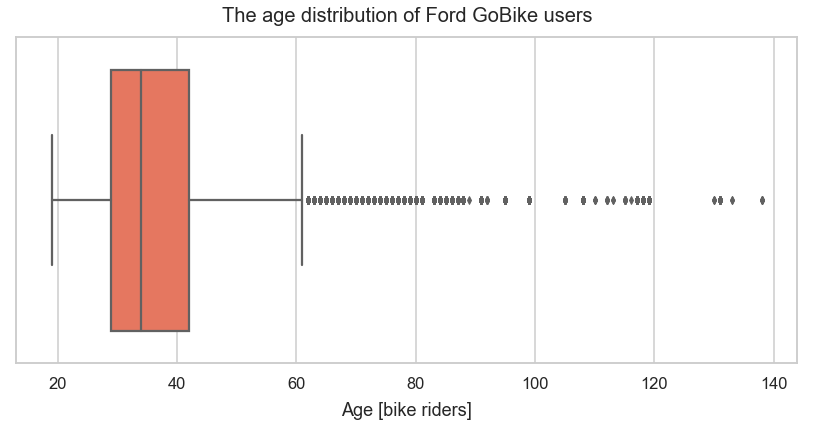

In [6]:
plt.figure(figsize=(14,6))
sns.boxplot(x='member_age', data=df, palette='Reds', orient='h')
plt.title("The age distribution of Ford GoBike users", fontsize=20, y=1.03)
plt.xlabel("Age [bike riders]", fontsize=18, labelpad=10)
plt.savefig('imageslide01.png');

## Monthly Trend of Bike Users

> There is seasonality when the season is winter because it is cold. However, bike rides of July 2017 and 2018 increased more than 5 times. This slide shows us, GoBike program is growing.

In [7]:
#Generate new fields for date from start_time and end_time
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])
df['start_time_date']=df['start_time'].dt.date
df['end_time_date']=df['end_time'].dt.date
df['start_time_year_month']=df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['end_time_year_month']=df['end_time'].map(lambda x: x.strftime('%Y-%m'))
df['start_time_year_month_renamed'] = df['start_time'].dt.strftime('%y' + '-' + '%m')
df['start_time_year']=df['start_time'].dt.year.astype(int)
df['end_time_year']=df['end_time'].dt.year.astype(int)
df['start_time_month']=df['start_time'].dt.month.astype(int)
df['end_time_month']=df['end_time'].dt.month.astype(int)
df['start_time_hour_minute']=df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['end_time_hour_minute']=df['end_time'].map(lambda x: x.strftime('%H-%m'))
df['start_time_hour']=df['start_time'].dt.hour
df['end_time_hour']=df['end_time'].dt.hour
df['start_time_weekday']=df['start_time'].dt.weekday_name
df['end_time_weekday']=df['end_time'].dt.weekday_name
df['start_time_weekday_abbr']=df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
df['end_time_weekday_abbr']=df['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

In [8]:
def transform_axis_fmt(tick_val, pos):
    if tick_val >= 1000:
        val = int(tick_val/1000)
        return '{:d}K'.format(val)
    elif tick_val >= 1000000: 
        val = int(tick_val/1000000)
        return '{:d}M'.format(val)
    else:
        return int(tick_val)

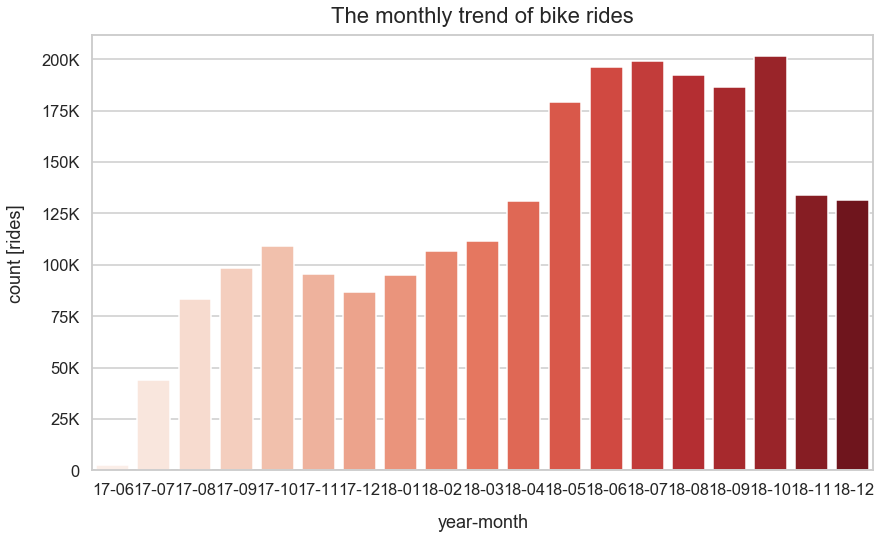

In [9]:
plt.figure(figsize=(14,8))
sns.countplot(x='start_time_year_month_renamed', palette="Reds", data=df.sort_values(by='start_time_year_month_renamed'))
plt.title('The monthly trend of bike rides', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('imageslide02.png')

## Monthly Trend of Age Groups
> 30-40 years old users are rapidly growing compared to other user groups. 20-30 years old users also showed great increase.



In [10]:
#Generate a new field for member age group from member_age_bin
df['member_age_group'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

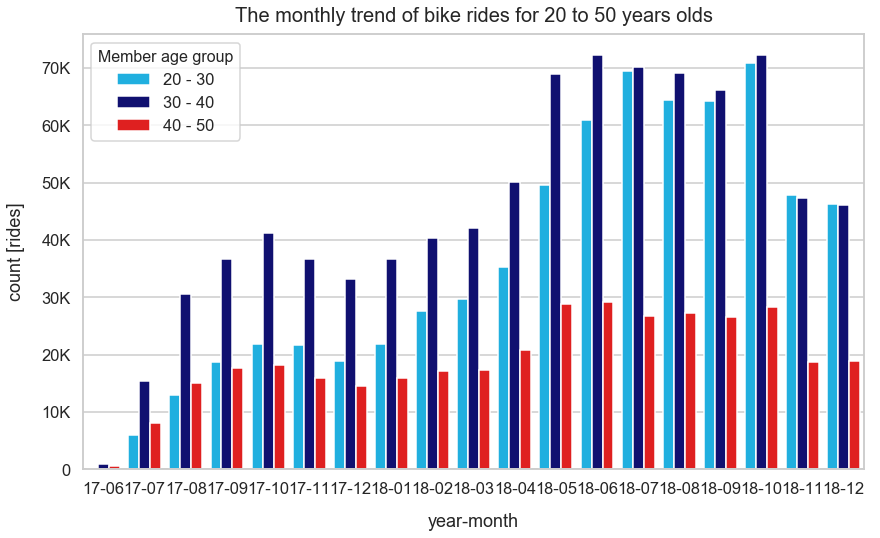

In [11]:
plt.figure(figsize=(14,8))
my_palette = {'20 - 30': 'deepskyblue', '30 - 40': 'navy', '40 - 50': 'red'}
ax = sns.countplot(x='start_time_year_month_renamed', hue='member_age_group', palette=my_palette, data=df[df['member_age_group'].isin(['20 - 30', '30 - 40', '40 - 50'])].sort_values(by=['start_time_year_month_renamed', 'member_age_group']))
plt.title('The monthly trend of bike rides for 20 to 50 years olds', fontsize=20, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('imageslide03.png');

## User Gender
> More males were using Ford GoBike than females.

In [12]:
trip_by_gender_df = df.groupby('member_gender').agg({'bike_id':'count'})
trip_by_gender_df['perc'] = (trip_by_gender_df['bike_id']/trip_by_gender_df['bike_id'].sum())*100

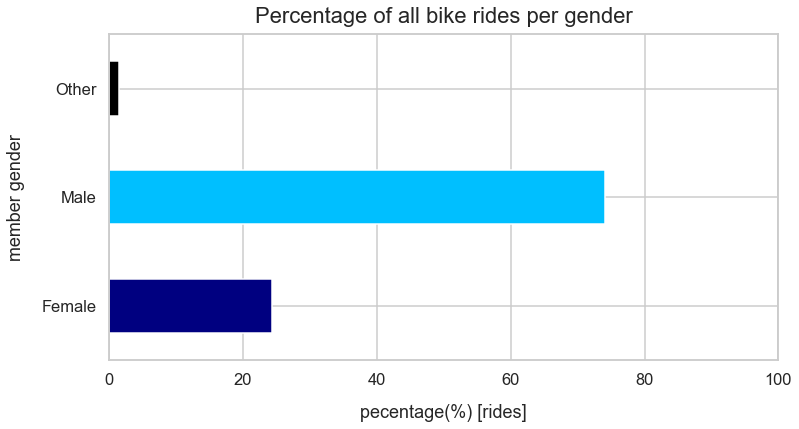

In [13]:
new_color = ['navy', 'deepskyblue', 'black']
trip_by_gender_df['perc'].plot(kind='barh', color=new_color, figsize=(12,6))
plt.title('Percentage of all bike rides per gender', fontsize=22, y=1.015)
plt.ylabel('member gender', labelpad=16)
plt.xlabel('pecentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)
plt.savefig('imageslide04.png');


## User trends of bike rides of subscribers vs customers
> Both subscribers and customers increased but subscribers increased more rapidly. While customers showed little change, subscribers showed some up and down during the period.

In [14]:
user_type_count_per_year_df = df.groupby(["start_time_year_month_renamed", "user_type"]).size().reset_index()

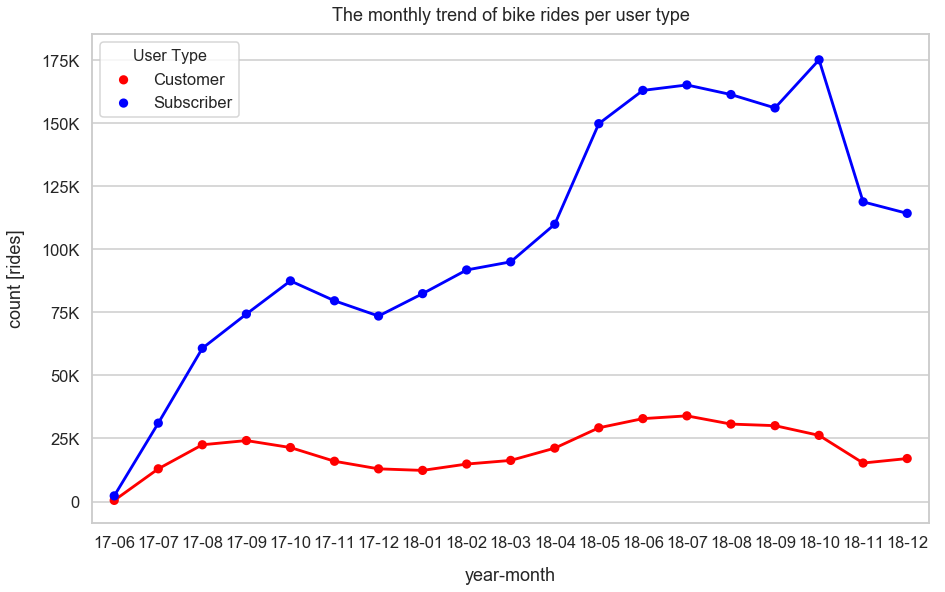

In [15]:
plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'blue', 'Customer':'red'}
ax = sns.pointplot(x='start_time_year_month_renamed', y=0, hue='user_type', palette=my_palette, scale=.7, data=user_type_count_per_year_df)
plt.title('The monthly trend of bike rides per user type', fontsize=18, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('image05.png');